### Simple (Univariate) Linear Regression - Single Feature

#### 1. Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function to read data and output features and labels
# arguments: file name
# return values: features, labels
def readData (file):
    data = pd.read_csv (file)
    X = data.iloc [:, 0].values
    Y = data.iloc [:, 1].values
    return X, Y

In [3]:
# forward pass
# arguments: weight, bias, X
# return values: predicted y (yhat)
def forwardPass (weight, bias, X):
    return (weight * X) + bias 

In [4]:
# cost
# arguments: yhat, y
# return values: cost
def costCalulator (yhat, Y):
    return ((1/ (2 * len (Y))) * (np.sum ((yhat - Y) ** 2)))

In [5]:
# gradient descent
# arguments: X, Y, learning rate and iterations
# return value: weight, bias and costs
def gradientDescent (X, Y, learningRate = 0.01, iterations = 100):
    weight, bias = 0, 0
    costs = []
    for _ in range (iterations):
        yhat = forwardPass (weight, bias, X)
        costs.append (costCalulator (yhat, Y))
        weight = weight - ((learningRate/ len (X)) * np.sum (np.multiply ((yhat - Y), X)))
        bias = bias - ((learningRate/ len (X)) * np.sum (yhat - Y))
    return weight, bias, costs

In [6]:
def plotLinearReg (X, Y, weight, bias):
    yhat = forwardPass (weight, bias, X)
    plt.scatter (X, Y)
    plt.plot (X, yhat)
    plt.xlabel ('Experience in years')
    plt.ylabel ('Salary')
    plt.show ()

In [7]:
X, Y = readData ('./Data/Salary_Data.csv')
weight, bias, costs = gradientDescent (X, Y, learningRate = 0.05, iterations = 10000)

In [8]:
print ("Weight: " + str (weight))
print ("Bias: " + str (bias))

Weight: 9449.9623214551
Bias: 25792.20019866854


Text(0,0.5,'Cost')

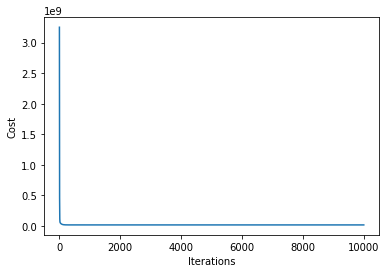

In [9]:
# plot the cost vs iteration
plt.plot (range (10000), costs)
plt.xlabel ('Iterations')
plt.ylabel ('Cost')

In [10]:
# try a sample prediction 
predictedValue = forwardPass (weight, bias, 1.6)
print ("Our model predicts that for 1.6 years of experience the salary is " + str (predictedValue))

Our model predicts that for 1.6 years of experience the salary is 40912.1399129967


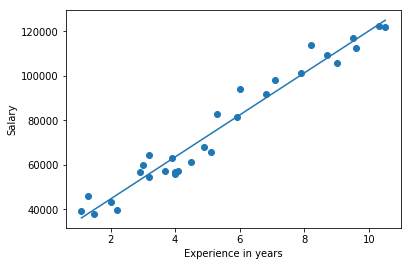

In [11]:
plotLinearReg (X, Y, weight, bias)

#### 2. Scikit-Learn - to verify our model

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()

In [13]:
# reshape the data, so that it could be fed into the lr object
X = np.reshape (X, (30, 1))
Y = np.reshape (Y, (30, 1))

In [14]:
lr.fit (X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print ("Weight: " + str (lr.coef_))
print ("Bias: " + str (lr.intercept_))

Weight: [[9449.96232146]]
Bias: [25792.20019867]


In [16]:
predictedValue = lr.predict ([[1.6]])
print ("Scikit-learn predicts that for 1.6 years of experience the salary is " + str (predictedValue))

Scikit-learn predicts that for 1.6 years of experience the salary is [[40912.139913]]


#### 3. Setting up a grid search in numpy

Identify the parameters that can be tuned - iterations and learning rate. These are called hyper-parameters

In [17]:
iterations = [100, 1000, 10000, 15000]
learningRates = [0.001, 0.003, 0.01, 0.03, 1]
gridSearch = []
for i in range (len (learningRates)):
    for j in range (len (iterations)):
        eachSearch = []
        weight, bias, costs = gradientDescent (X, Y, learningRate = learningRates [i], iterations = iterations [j])
        eachSearch.append (learningRates [i])
        eachSearch.append (iterations [j])
        eachSearch.append (costs [-1])
        gridSearch.append (eachSearch)

C:\Users\abhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\abhil\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\abhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [18]:
gridData = pd.DataFrame (gridSearch, columns = ['Learning Rate', 'Iterations', 'Error/ Cost'])

In [19]:
gridData

,Learning Rate,Iterations,Error/ Cost
0,0.001,100,7.656129e+07
1,0.001,1000,5.597446e+07
2,0.001,10000,1.653085e+07
3,0.001,15000,1.574344e+07
4,0.003,100,6.992342e+07
5,0.003,1000,3.295288e+07
6,0.003,10000,1.563566e+07
7,0.003,15000,1.563548e+07
8,0.010,100,5.611219e+07
9,0.010,1000,1.653066e+07
